In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Import pageview data
df = pd.read_csv("fcc-forum-pageviews.csv")

In [3]:
# Changing date to date-time datatype, creating new columns based on year, month, and day, and setting the date column to be the index
df["date"] = pd.to_datetime(df.date)
df["year"] = pd.DatetimeIndex(df.date).year
df["month"] = pd.DatetimeIndex(df.date).month
df["day"] = pd.DatetimeIndex(df.date).day
df = df.set_index("date", drop = True)

In [4]:
# Cleaning data by filtering out days when page views were in the top 2.5% or bottom 2.5% of the dataset
upper_limit = df.value.quantile(.975)
lower_limit = df.value.quantile(.025)
df = df[df.value < upper_limit]
df = df[df.value > lower_limit]

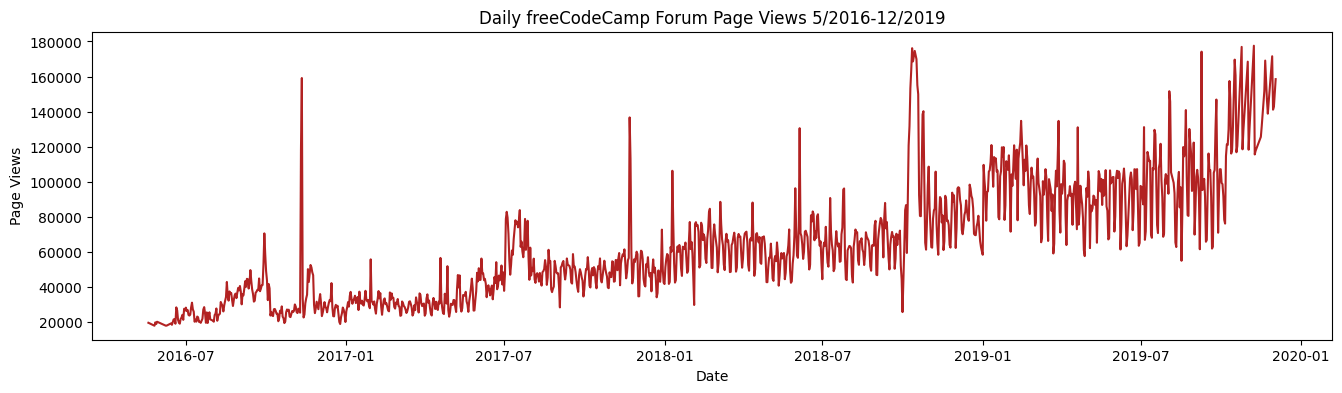

In [5]:
# Create a line plot showing page view count change over time
fig, axes = plt.subplots(figsize=(16, 4))
axes.plot(df.index, df.value, c = "firebrick")
axes.set_xlabel("Date")
axes.set_ylabel("Page Views")
axes.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019");

In [6]:
# Packaging the generation of the line plot into a function for use with freeCodeCamp tests
def draw_line_plot():
    fig, axes = plt.subplots(figsize=(16, 4))
    axes.plot(df.index, df.value, c = "firebrick")
    axes.set_xlabel("Date")
    axes.set_ylabel("Page Views")
    axes.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019");

    fig.savefig('line_plot.png')
    return fig

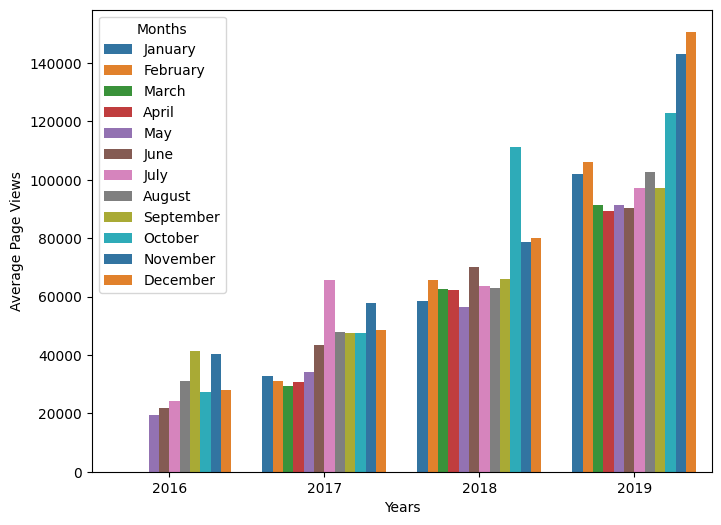

In [7]:
# Create a bar plot breaking down page views by months grouped by years
plt.subplots(figsize=(8, 6))
fig = sns.barplot(x = "year", y = "value", hue = "month", data = df, errorbar = None, palette = "tab10")
fig.set(xlabel = "Years", ylabel = "Average Page Views")
fig.legend(title = "Months", labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
fig;

In [8]:
# Packaging generation of the bar plot into a function for use with freeCodeCamp tests
def draw_bar_plot():
    plt.subplots(figsize=(8, 6))
    df_bar = sns.barplot(x = "year", y = "value", hue = "month", data = df, errorbar = None, palette = "tab10")
    df_bar.set(xlabel = "Years", ylabel = "Average Page Views")
    df_bar.legend(title = "Months", labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

    fig = df_bar.get_figure()
    fig.savefig('bar_plot.png')
    return fig

In [9]:
# Preparing x-axis labels for the next plot
months = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
df = df.replace({"month": months})

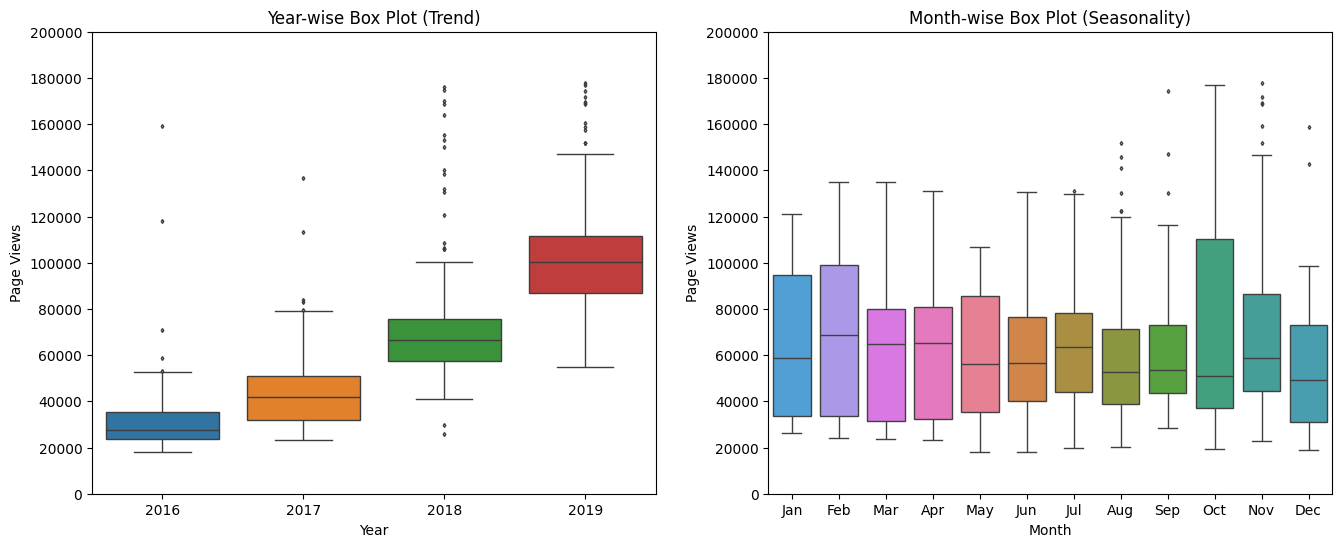

In [10]:
# Examine page view trends using box plot for both year and month
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
plt.setp(axes[:], ylim=[0,200000])
axes[0].set_yticks(range(0, 200001, 20000))
axes[1].set_yticks(range(0, 200001, 20000))
fig1 = sns.boxplot(x = "year", y = "value", hue = "year", data = df, palette = "tab10", legend = False, flierprops = {"marker": "d", "markersize" : 2}, ax = axes[0])
fig1.set(xlabel = "Year", ylabel = "Page Views", title = "Year-wise Box Plot (Trend)")
fig2 = sns.boxplot(x = "month", y = "value", hue = "month", data = df, legend = False, flierprops = {"marker": "d", "markersize" : 2}, ax = axes[1], order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
fig2.set(xlabel = "Month", ylabel = "Page Views", title = "Month-wise Box Plot (Seasonality)");

In [11]:
# Packaging generation of box plots into a function for use with freeCodeCamp tests
def draw_box_plot():
    fig, axes = plt.subplots(1, 2, figsize = (16, 6))
    plt.setp(axes[:], ylim=[0,200000])
    axes[0].set_yticks(range(0, 200001, 20000))
    axes[1].set_yticks(range(0, 200001, 20000))
    fig1 = sns.boxplot(x = "year", y = "value", hue = "year", data = df, palette = "tab10", legend = False, flierprops = {"marker": "d", "markersize" : 2}, ax = axes[0])
    fig1.set(xlabel = "Year", ylabel = "Page Views", title = "Year-wise Box Plot (Trend)")
    fig2 = sns.boxplot(x = "month", y = "value", hue = "month", data = df, legend = False, flierprops = {"marker": "d", "markersize" : 2}, ax = axes[1], order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    fig2.set(xlabel = "Month", ylabel = "Page Views", title = "Month-wise Box Plot (Seasonality)");
    
    fig.savefig('box_plot.png')
    return fig